In [1]:
# Step 1: Import sqlite3 and connect to the database

import sqlite3

# Create a connection to the SQLite database file
# If 'sales_data.db' does not exist, it will be created automatically
conn = sqlite3.connect("sales_data.db")

# Optional: print a success message
print("✅ Connected to sales_data.db successfully!")


✅ Connected to sales_data.db successfully!


In [3]:
# Step 2: Create the 'sales' table and insert sample data

cursor = conn.cursor()

# Drop the table if it already exists (optional, for re-runs)
cursor.execute("DROP TABLE IF EXISTS sales")

# Create the sales table
cursor.execute('''
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sample data into the sales table
sample_data = [
    (1, "Pen", 10, 5.0),
    (2, "Notebook", 5, 20.0),
    (3, "Pencil", 15, 2.0),
    (4, "Eraser", 7, 3.0)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?, ?)", sample_data)

# Save changes
conn.commit()

print("✅ sales table created and sample data inserted.")


✅ sales table created and sample data inserted.


In [5]:
# Step 3: Query total quantity and total revenue from the sales table

# Query for total quantity sold
cursor.execute("SELECT SUM(quantity) FROM sales")
total_quantity = cursor.fetchone()[0]

# Query for total revenue
cursor.execute("SELECT SUM(quantity * price) FROM sales")
total_revenue = cursor.fetchone()[0]

# Print the results
print("📊 Basic Sales Summary")
print(f"🛒 Total Quantity Sold: {total_quantity}")
print(f"💰 Total Revenue: ₹{total_revenue}")


📊 Basic Sales Summary
🛒 Total Quantity Sold: 37
💰 Total Revenue: ₹201.0


📋 Sales Summary by Product:
    product  total_qty  revenue
0    Eraser          7     21.0
1  Notebook          5    100.0
2       Pen         10     50.0
3    Pencil         15     30.0


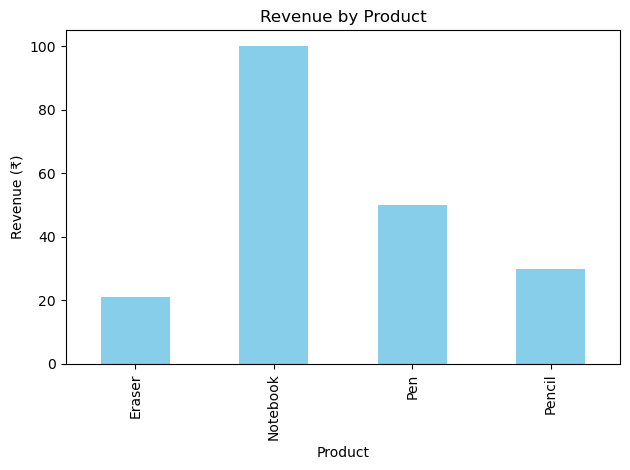

In [7]:
# Step 4: Run SQL query and load results into pandas DataFrame

import pandas as pd
import matplotlib.pyplot as plt

# SQL query to get total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Load the query results into a DataFrame
df = pd.read_sql_query(query, conn)

# Print the summary table
print("📋 Sales Summary by Product:")
print(df)

# Plot a bar chart for revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.tight_layout()

# Save the chart as PNG file (optional)
plt.savefig("sales_chart.png")

# Show the plot
plt.show()


In [9]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>